In [2]:
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pylab as plt

In [3]:
def getfilepath(h):
    '''
    gets file path for data of halo h in [CDM, SIDM] order 
    '''
    
    cdm = '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r'+str(h)+'.romulus25.3072g1HsbBH/r'+str(h)
    cdm += '.romulus25.3072g1HsbBH.004096'
    
    sidm = '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r'+str(h)+'.romulus25cvdXsec.3072g1HsbBH/r'+str(h)
    sidm +='.romulus25cvdXsec.3072g1HsbBH.004096'
    
    return [cdm,sidm]

In [4]:
haloIDs = [431, 468, 492, 502, 569, 523]

In [7]:
def makeStarImage(hID, width=10, sidm=0):
    fileadd = '.romulus25.3072g1HsbBH.004096'
    if sidm:
        fileadd = '.romulus25cvdXsec.3072g1HsbBH.004096'
        
    fig = plt.figure(figsize=(8,8), facecolor='w')
        
    f = getfilepath(hID)[sidm]+'/r'+str(hID)+fileadd
    
    s = pynbody.load(f)
    s.physical_units()
    
    h = s.halos()

    # center on the largest halo and align the disk
    pynbody.analysis.angmom.faceon(h[1])
    
    pynbody.plot.stars.render(s,width=str(width)+' kpc')
    
    tag = 'CDM'
    if sidm: tag = 'SIDM'
    plt.title('r'+str(hID) + ' '+tag, fontsize=20, fontfamily='serif')

    if sidm:
        plt.savefig('../figures/images/r'+str(hID)+'SIDMStarImg.png')
    else:
        plt.savefig('../figures/images/r'+str(hID)+'CDMStarImg.png')

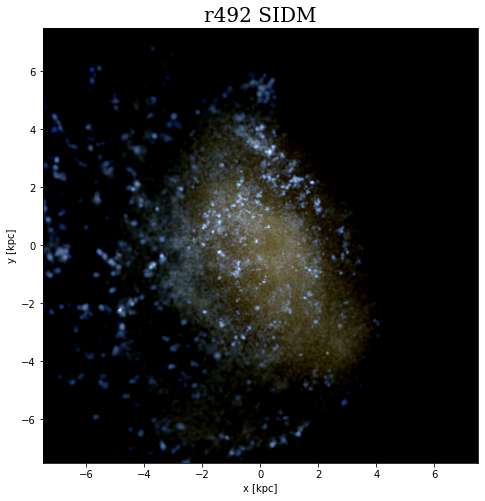

In [8]:
makeStarImage(haloIDs[2],width=15, sidm=1)